In [81]:

import pandas as pd
import sqlite3

In [82]:
con= sqlite3.connect('password_data.sqlite')

In [83]:
data=pd.read_sql_query('Select * from Users',con)

In [84]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [85]:
data.describe()

,index,strength
count,100000.000000,100000.000000
mean,49999.500000,0.988730
std,28867.657797,0.510926
min,0.000000,0.000000
25%,24999.750000,1.000000
50%,49999.500000,1.000000
75%,74999.250000,1.000000
max,99999.000000,2.000000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [87]:
data.shape

(100000, 3)

In [88]:
data.drop('index',axis=1,inplace=True)

In [89]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [90]:
data.duplicated().sum()

np.int64(0)

Till now we:
1. converted data from sql to the pandas.
2. no duplicates and no missing values are there.
3. 100k rows are there and we drop index feature as it is not needed.

In [91]:
# for checking numeric features
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [92]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [93]:
# for checking upper case features
data[data["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [94]:
# for checking title features
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [95]:
# for checking alphanumeric features
data[data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [96]:
# for checking special character features
import string

In [97]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [98]:
def find_sematics(row):
    for char in row:
        if char in string.punctuation:
            return 1
    return 0

In [99]:
data[data['password'].apply(find_sematics) ==1 ]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


Till now we:
1.  check for numeric, uppercase, title, alphanumeric and special characters.

In [100]:
#length 
data['length']=data['password'].str.len()

In [101]:
data.head()

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


In [102]:
#for uppercase frequency,lowercase,digit
def func_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)
def func_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)
def func_digitcase(row):
    return len([char for char in row if char.isdigit()])/len(row)

    

In [103]:
import numpy as np
data['freq_uppercase']=np.round(data['password'].apply(func_uppercase),3)
data['freq_lowercase']=np.round(data['password'].apply(func_lowercase),3)
data['freq_digitcase']=np.round(data['password'].apply(func_digitcase),3)


In [104]:
data.head()

,password,strength,length,freq_uppercase,freq_lowercase,freq_digitcase
0,zxe870819,1,9,0.0,0.333,0.667
1,xw46454nr23l,1,12,0.0,0.417,0.583
2,soporte13,1,9,0.0,0.778,0.222
3,accounts6000webhost.com,2,23,0.0,0.783,0.174
4,c443balg,1,8,0.0,0.625,0.375


In [105]:
#for special characters or which are not alphabet r digit
def fun_special(row):
    special=[]
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special.append(char)
    return len(special)/len(row)

In [106]:
data['special_char_freq']=np.round(data['password'].apply(fun_special),3)

In [107]:
data.head()

,password,strength,length,freq_uppercase,freq_lowercase,freq_digitcase,special_char_freq
0,zxe870819,1,9,0.0,0.333,0.667,0.000
1,xw46454nr23l,1,12,0.0,0.417,0.583,0.000
2,soporte13,1,9,0.0,0.778,0.222,0.000
3,accounts6000webhost.com,2,23,0.0,0.783,0.174,0.043
4,c443balg,1,8,0.0,0.625,0.375,0.000


Till now we:
1. add length, frequency of uppercase, frequency of lowercase, frequency of digits, and frequency of special characters in the dataset.
2. normalize the data so that they will  not be prone to outliers.

In [108]:
#aggregating features according to strength

data[['length','strength']].groupby(['strength']).agg(['min','max','mean','median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [109]:
my_list=['length','freq_uppercase','freq_lowercase','freq_digitcase','special_char_freq']

for i in my_list:
    print(data[[i,'strength']].groupby(['strength']).agg(['min','max','mean','median']))
    print("\n")

         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


         freq_uppercase                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


         freq_lowercase                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


         freq_digitcase                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.275383

<Axes: xlabel='strength', ylabel='special_char_freq'>

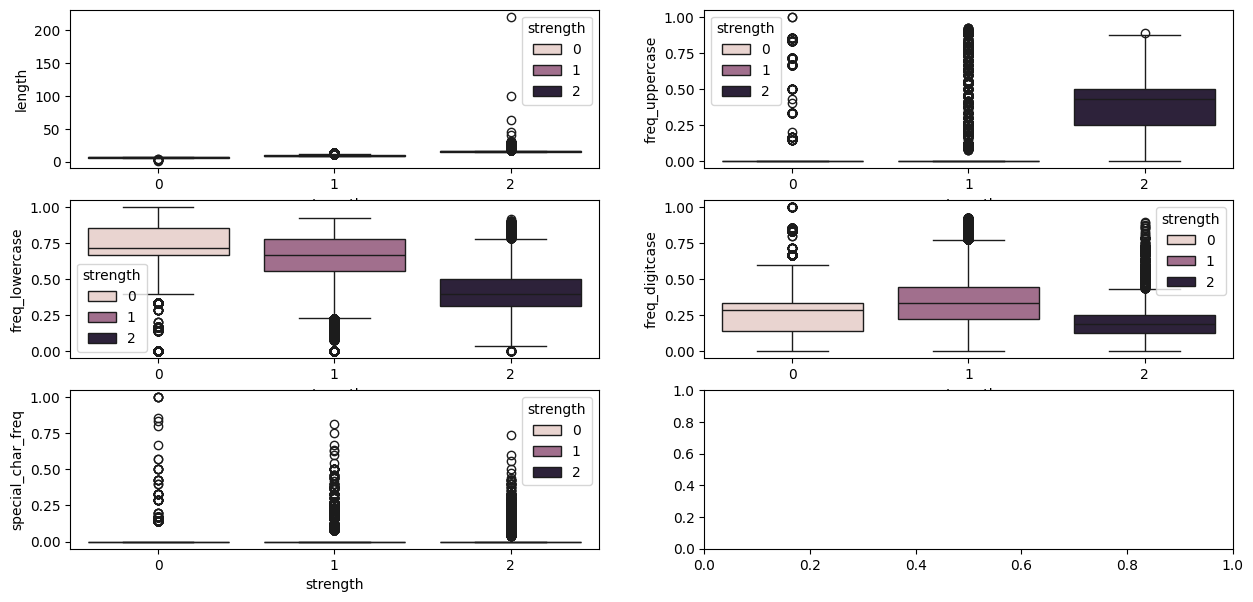

In [110]:
#plotting boxplot for visualization

import seaborn as sns
import matplotlib.pyplot as plt
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(15,7))
sns.boxplot(x='strength',y='length',hue='strength',data=data,ax=ax1)
sns.boxplot(x='strength',y='freq_uppercase',hue='strength',data=data,ax=ax2)
sns.boxplot(x='strength',y='freq_lowercase',hue='strength',data=data,ax=ax3)
sns.boxplot(x='strength',y='freq_digitcase',hue='strength',data=data,ax=ax4)
sns.boxplot(x='strength',y='special_char_freq',hue='strength',data=data,ax=ax5)

Till now we :
1. Perform comparison and get that higher length get higher strength, freq_uppercase is directly proportional to strngth while freq_lowercase is inversely proportional, freq_digitcase is inversely proportional while freq_special_case is directly proportional to strength.

In [111]:
#to get importance of the features
def get_dist(data,feature):
    plt.subplot(1,2,1)
    sns.violinplot(x='strength',y=feature, data=data)
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature],color='red',label='0',hist=False)
    sns.distplot(data[data['strength']==1][feature],color='green',label='1',hist=False)
    sns.distplot(data[data['strength']==2][feature],color='blue',label='2',hist=False)
    plt.legend()
    plt.show()

In [112]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

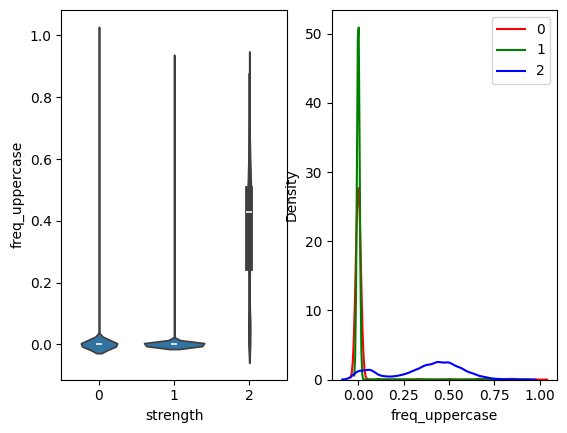

In [113]:

get_dist(data,'freq_uppercase')

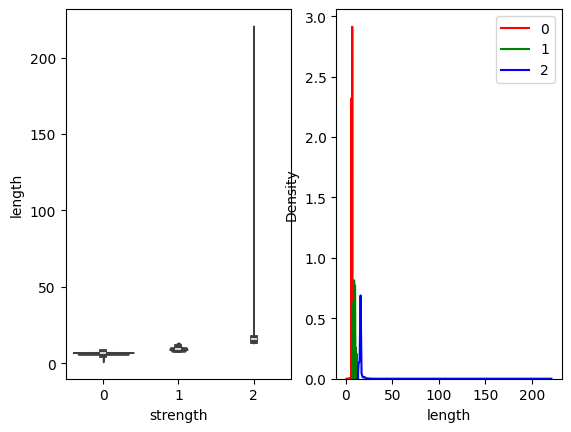

In [114]:

get_dist(data,'length')

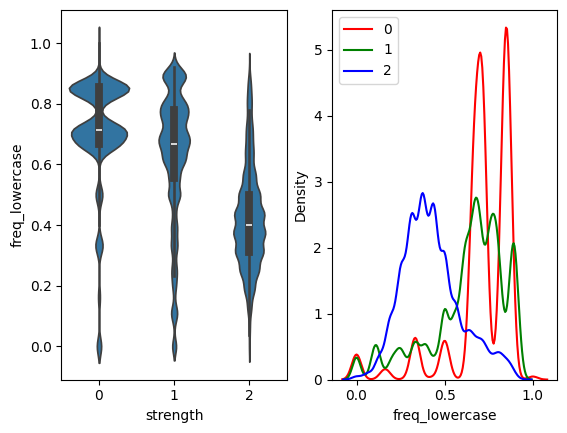

In [115]:

get_dist(data,'freq_lowercase')

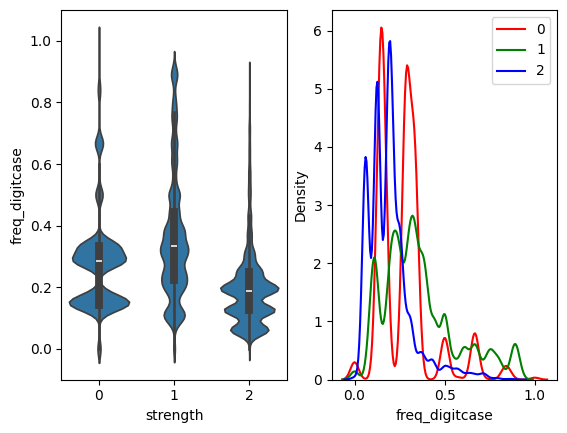

In [116]:

get_dist(data,'freq_digitcase')

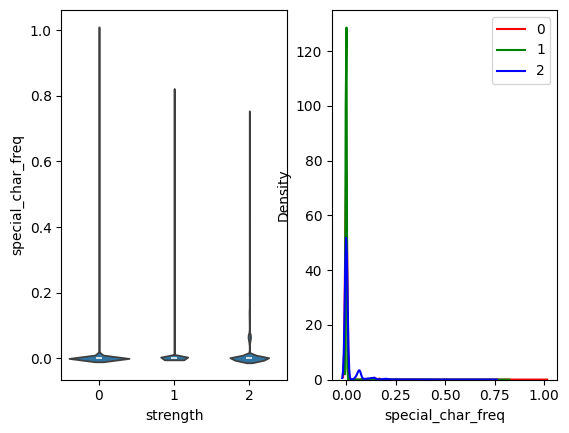

In [117]:

get_dist(data,'special_char_freq')

Till now we:
1.  Plot violin plot and distribution plot and got result that length is highly imortant as less overlapping and lower  is considerable importance than digit or special character case or upper_case  frequenncy

In [118]:
# for conversion of string of password to vector form we use Tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
#for shuffling data 
dataframe=data.sample(frac=1)

In [120]:
dataframe

,password,strength,length,freq_uppercase,freq_lowercase,freq_digitcase,special_char_freq
13485,k4rl0s,0,6,0.0,0.667,0.333,0.0
95160,9shiliu,0,7,0.0,0.857,0.143,0.0
40813,mawiku573,1,9,0.0,0.667,0.333,0.0
32028,inoebudi93,1,10,0.0,0.800,0.200,0.0
9975,castor380,1,9,0.0,0.667,0.333,0.0
...,...,...,...,...,...,...,...
32557,rogul195,1,8,0.0,0.625,0.375,0.0
58404,bohemia123q,1,11,0.0,0.727,0.273,0.0
55368,01234567ab,1,10,0.0,0.200,0.800,0.0
54848,pamikud278,1,10,0.0,0.700,0.300,0.0


In [121]:
vectorizer=TfidfVectorizer(analyzer='char')

In [122]:
vectorizer

TfidfVectorizer(analyzer='char')

In [123]:
x=list(dataframe['password'])

In [124]:
X=vectorizer.fit_transform(x)

In [125]:
X.shape

(100000, 99)

In [126]:
dataframe['password'].shape

(100000,)

In [127]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [128]:
len(vectorizer.get_feature_names_out())

99

In [129]:
df2=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

In [130]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Till now we:
1. Convert password string to vector form by using tf-idf NLP technique and preapared a pandas dataframe having rows= vectorizer conversion list(tf*idf) and coloums= characters which are introduced in the password which is 99


In [131]:
#model training
#adding length and lower case frequency in dataframe as strength is dependent on it
df2['length']=dataframe['length']
df2['lower_case_freq']=dataframe['freq_lowercase']

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2,dataframe['strength'],test_size=0.2)

In [133]:
x_train.shape

(80000, 101)

In [134]:
x_test.shape

(20000, 101)

In [135]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score

In [136]:
# it is classification tasks so checking accuracy for the different models which outperform in classification tasks
def check(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    print("Accuracy :",accuracy_score(y_test,y_pred))
    print("Precision :",precision_score(y_test,y_pred,average='micro'))
    print("Recall :",recall_score(y_test,y_pred,average='micro'))
    print("F1 score :",f1_score(y_test,y_pred,average='micro'))
    
    print("confusion matrix:")
    
    print(confusion_matrix(y_test,y_pred))
    
    
    

In [137]:
#logisitc regression
from sklearn.linear_model import LogisticRegression
check(LogisticRegression(multi_class='multinomial'))

Accuracy : 0.8041
Precision : 0.8041
Recall : 0.8041
F1 score : 0.8041
confusion matrix:
[[  819  1943     2]
 [  619 13817   312]
 [   61   981  1446]]


In [138]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
check(MultinomialNB())

Accuracy : 0.7387
Precision : 0.7387
Recall : 0.7387
F1 score : 0.7387
confusion matrix:
[[    6  2745    13]
 [    2 14704    42]
 [    1  2423    64]]


In [139]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
check(DecisionTreeClassifier())

Accuracy : 0.8873
Precision : 0.8873
Recall : 0.8873
F1 score : 0.8873
confusion matrix:
[[ 1986   719    59]
 [  613 13756   379]
 [   93   391  2004]]


In [140]:
#Random forest 
from sklearn.ensemble import RandomForestClassifier
check(RandomForestClassifier())

Accuracy : 0.92835
Precision : 0.92835
Recall : 0.92835
F1 score : 0.92835
confusion matrix:
[[ 1875   885     4]
 [  146 14510    92]
 [   12   294  2182]]


Till now we:
1. Perform model training and found that Random Forest Classifier is best among all

In [141]:
#Hypertuning parameter
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()

In [142]:
import numpy as np
n_estimators= [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features= ['auto','sqrt']
max_depth= [int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,20]

In [143]:
random_grid={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [144]:
rg=RandomizedSearchCV(rf,random_grid, verbose=2, cv=3, n_jobs=-1)

In [145]:
rg.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [146]:
rg.best_params_


{'n_estimators': 760,
 'min_samples_split': 20,
 'max_features': 'sqrt',
 'max_depth': 30}

In [147]:
rg.best_score_

np.float64(0.9116125309102653)

In [148]:
model=rg.best_estimator_

In [149]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [153]:
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

Till now  we:
1. Hypertune the model and dump it using pickle


# Testing Passwords

In [150]:
import pickle
model= pickle.load(open('model.pkl', 'rb'))

In [151]:
def predict():
    password=input("Enter password:")
    arr=np.array([password])
    matrix=vectorizer.transform(arr)
    length_pass=len(password)
    length_normalized_lowercase=len([char for char in password if char.islower()])/len(password)
    
    new_matrix=np.append(matrix.toarray(),(length_pass,length_normalized_lowercase)).reshape(1,101)
    result=model.predict(new_matrix)
    if result==0:
        print("Weak Password")
    elif result==1:
        print("Normal Password")
    else:
        print("Strong Password")

In [152]:
predict()

Normal Password
